# Data Science and Business Analytics Intern 

# Author : Himani Sharma

In [20]:
## Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle, islice
import warnings
%matplotlib inline

# Loading data

In [142]:
match_file=pd.read_csv('matches.csv')
deliveries_file=pd.read_csv('deliveries.csv')

season_data=match_file[['id','season','winner']]

complete_data=deliveries_file.merge(season_data,left_on='match_id',right_on='id',how='inner')

In [143]:
match_file.head()


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


Appending 1 more column to match data

In [144]:
match_file['win_by']=np.where(match_file['win_by_runs']>0,'Bat ','Bowl')
match_file.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,win_by
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,Bat
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,Bowl
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,Bowl
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,Bowl
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,Bat


Checking the dimensions of new match data

In [145]:
match_file.shape

(756, 19)

Visulalizing Dileveries data

In [146]:
deliveries_file.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


Adding 2 more columns to delivery_data

In [147]:
deliveries_file['total_extra_runs']=deliveries_file['extra_runs'].cumsum()
deliveries_file['total_delivery_runs']=deliveries_file['total_runs'].cumsum()

#visualizing data
deliveries_file.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,total_extra_runs,total_delivery_runs
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,NaN,NaN,NaN,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,NaN,NaN,NaN,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,4,0,4,NaN,NaN,NaN,0,4
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,NaN,NaN,NaN,0,4
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,2,2,NaN,NaN,NaN,2,6


# Analysis of Data

# Run Scores of each team in IPL

In [149]:
teams_runs=deliveries_file.groupby("batting_team")[["total_runs"]].sum().reset_index().sort_values('total_runs',ascending=False).reset_index(drop=True)
#teams_runs=deliveries_file.groupby("batting_team")[["total_runs"]].sum()
teams_runs

,batting_team,total_runs
0,Mumbai Indians,29809
1,Royal Challengers Bangalore,28126
2,Kings XI Punjab,27893
3,Kolkata Knight Riders,27419
4,Chennai Super Kings,26418
5,Delhi Daredevils,24388
6,Rajasthan Royals,22431
7,Sunrisers Hyderabad,17059
8,Deccan Chargers,11463
9,Pune Warriors,6358


# Comparison of runs scored by each team in IPL

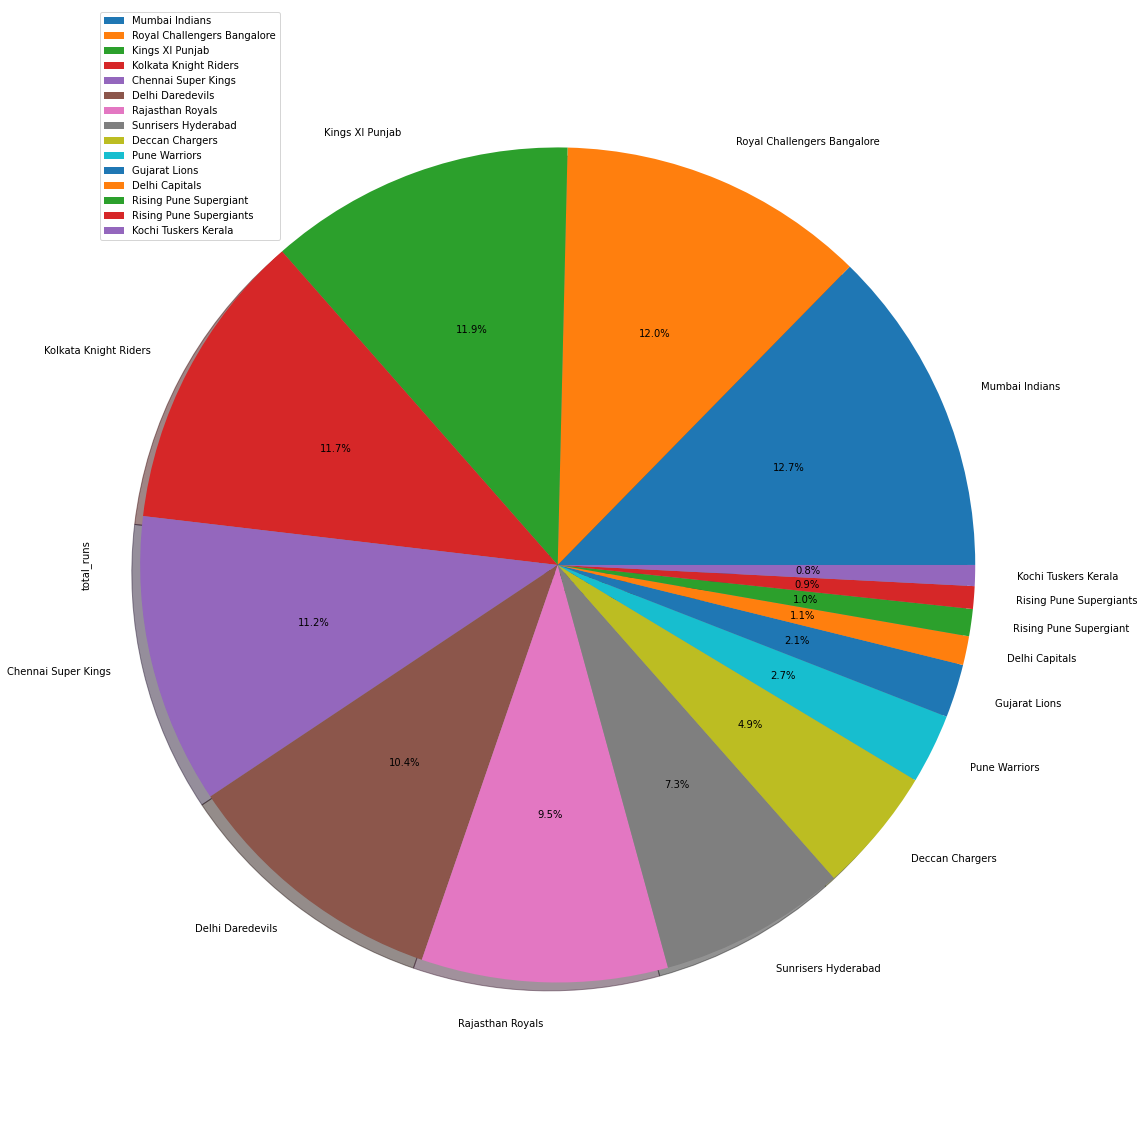

In [151]:

ax=teams_runs.plot.pie(y='total_runs', labels=teams_runs['batting_team'],figsize=(16, 16),shadow=True,autopct='%1.1f%%')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Matches won by teams

Text(0.5, 1.0, 'Count of Matches won by Teams')

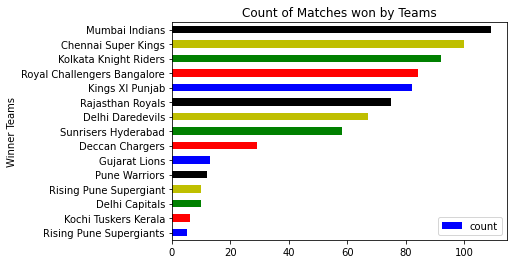

In [152]:
plot1=match_file.groupby('winner')['winner'].agg(['count']).sort_values('count').reset_index()
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(plot1)))

ax=plot1.plot(x='winner',y='count',kind='barh',color=my_colors)
ax.set_ylabel('Winner Teams')
ax.set_title('Count of Matches won by Teams')


# Matches played in each season

Text(0, 0.5, 'Matches')

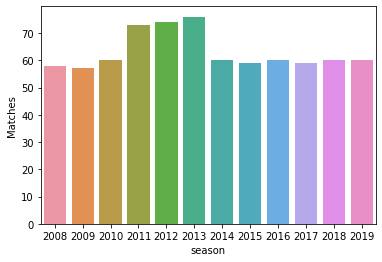

In [153]:
ax=sns.countplot(x='season',data=match_file)
plt.ylabel('Matches')


# Is Toss Winning resulting into Winning?

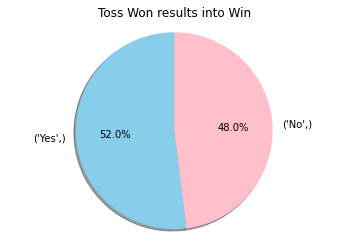

In [327]:
df= pd.DataFrame()
df['Win']=np.where(match_file.toss_winner==match_file.winner,'Yes','No')
result=df.value_counts()

shares = result.values
colors = ['skyblue', 'pink']
labels=np.array(result.index)
 
# Plot
plt.pie(shares, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)

plt.title('Toss Won results into Win')
plt.axis('equal')
plt.show()

# Does Batting first impact Win Percentage?

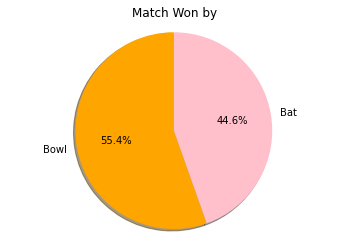

In [155]:
df=match_file.win_by.value_counts()
shares = df.values
labels=np.array(df.index)

#plotting
plt.pie(shares, labels=labels,startangle=90, colors=['orange','pink'],
        autopct='%1.1f%%', shadow=True)
plt.title('Match Won by')
plt.axis('equal')
plt.show()

Text(0.5, 1.0, 'Matches won by Batting/Bowling first')

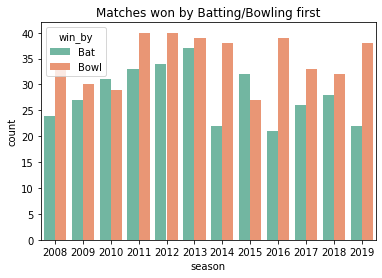

In [156]:
#A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.
ax=sns.countplot(x='season',palette="Set2",hue='win_by',data=match_file,)
ax.set_title('Matches won by Batting/Bowling first')

# What do teams choose more often on winning toss?

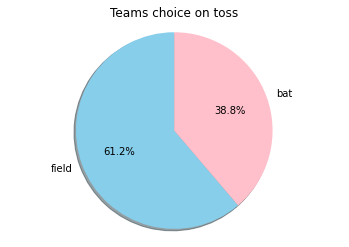

In [157]:
toss_decision=match_file.toss_decision.value_counts()
shares = toss_decision.values
labels=np.array(toss_decision.index)

colours = [ 'skyblue','pink']
plt.pie(shares, colors=colours, 
        autopct='%1.1f%%',labels=labels, shadow=True,startangle=90)

plt.title('Teams choice on toss')
plt.axis('equal')
plt.show()

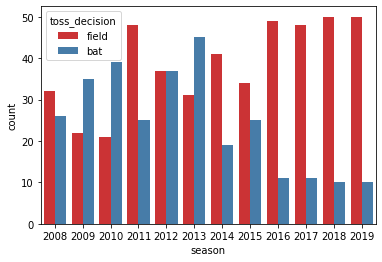

In [326]:
ax=sns.countplot(x='season',data=match_file,palette="Set1",hue='toss_decision')

# Most succsessful Batsmen in each season of IPL

In [159]:
most_successful_batsmen=complete_data.groupby(["season","batsman"])["batsman_runs"].sum().reset_index().sort_values(by="batsman_runs",ascending=False).reset_index(drop=True).drop_duplicates(subset=["season"],keep="first").sort_values(by="season").reset_index(drop=True)
most_successful_batsmen


,season,batsman,batsman_runs
0,2008,SE Marsh,616
1,2009,ML Hayden,572
2,2010,SR Tendulkar,618
3,2011,CH Gayle,608
4,2012,CH Gayle,733
5,2013,MEK Hussey,733
6,2014,RV Uthappa,660
7,2015,DA Warner,562
8,2016,V Kohli,973
9,2017,DA Warner,641


Copmarison of Most successful batsmen

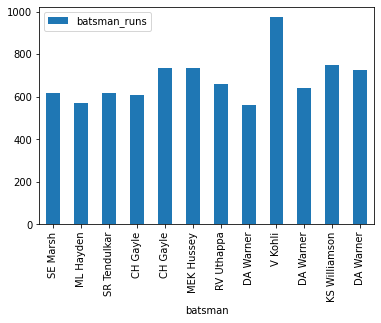

In [160]:
ax=most_successful_batsmen.plot(x="batsman",y='batsman_runs',kind='bar')


# Most succsessful Bowlers in each season of IPL

In [161]:
most_successful_bowlers=complete_data[complete_data["dismissal_kind"]!="run out"].groupby(["season","bowler"])["dismissal_kind"].count().reset_index().sort_values(by="dismissal_kind",ascending=False).reset_index(drop=True).drop_duplicates(subset=["season"],keep="first").sort_values(by="season").reset_index(drop=True)
most_successful_bowlers.columns= ["Season","Bowler","Wicket"]
most_successful_bowlers

,Season,Bowler,Wicket
0,2008,Sohail Tanvir,22
1,2009,RP Singh,23
2,2010,PP Ojha,21
3,2011,SL Malinga,28
4,2012,M Morkel,25
5,2013,DJ Bravo,32
6,2014,MM Sharma,23
7,2015,DJ Bravo,26
8,2016,B Kumar,23
9,2017,B Kumar,26


Copmarison of Most successful bowlers


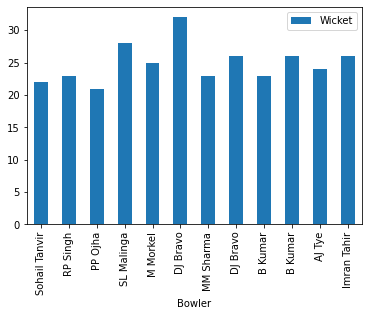

In [162]:
ax=most_successful_bowlers.plot('Bowler','Wicket',kind='bar')

# Highest Run Scorer Batsmen in IPL

In [163]:
batsman_runs=deliveries_file.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True)
batsman_runs=batsman_runs.rename(columns={'sum':'batsman_runs'})
batsman_runs.head(10)

,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


# Batsmen who played the most number of matches

In [164]:
Count_Matches_batsman_out = deliveries_file[["match_id","player_dismissed"]]
Count_Matches_batsman_out =Count_Matches_batsman_out .groupby("player_dismissed")["match_id"].count().reset_index().sort_values(by="match_id",ascending=False).reset_index(drop=True)
Count_Matches_batsman_out.columns=["batsman","Matches Played"]
Count_Matches_batsman_out.head()


,batsman,Matches Played
0,SK Raina,162
1,RG Sharma,155
2,RV Uthappa,153
3,V Kohli,143
4,S Dhawan,137


# Highest Batting Average Players

In [165]:
batting_avg=pd.merge(batsman_runs,Count_Matches_batsman_out ,on="batsman")
batting_avg["Average"]=batting_avg["batsman_runs"]/batting_avg["Matches Played"]
batting_avg=batting_avg.sort_values(by="Average",ascending=False).reset_index(drop=True)

top_ten_bat_avg=batting_avg.head(10)
batting_avg.head(10)

,batsman,batsman_runs,Matches Played,Average
0,J Bairstow,468,8,58.500000
1,MN van Wyk,167,3,55.666667
2,AC Voges,181,4,45.250000
3,HM Amla,577,13,44.384615
4,Iqbal Abdulla,88,2,44.000000
5,DA Warner,4741,110,43.100000
6,KL Rahul,2013,47,42.829787
7,MS Dhoni,4477,105,42.638095
8,CH Gayle,4560,109,41.834862
9,PD Collingwood,203,5,40.600000


Comparison of Highest Batting Average Players

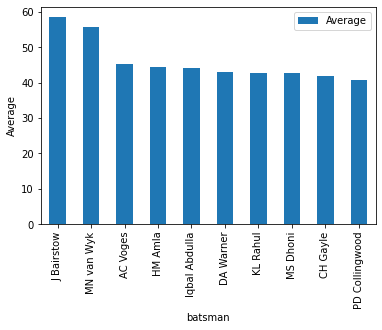

In [166]:
ax=top_ten_bat_avg.plot('batsman','Average',ylabel='Average',kind='bar')


# Analysis of Dismissals of batsmen

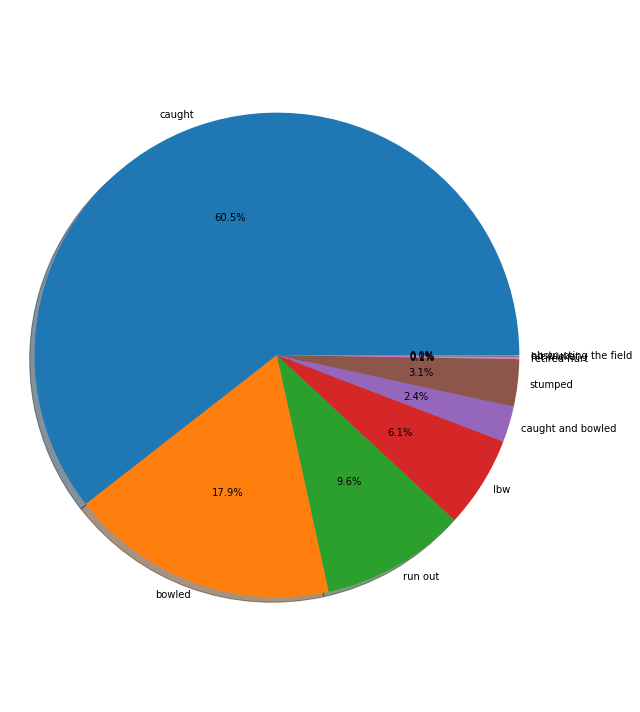

In [282]:
sizes=[]
labels=[]
labels_df=(pd.DataFrame(deliveries_file["dismissal_kind"].dropna().unique()))
for column in labels_df:
   # Select column contents by column name using [] operator
   columnSeriesObj = labels_df[column]
   labels_df= columnSeriesObj.values
for x in labels_df:
    sizes.append(deliveries_file[deliveries_file['dismissal_kind'] == x].count().dismissal_kind)
    labels.append(x)
    
sizes
labels

fig1, ax1 = plt.subplots(figsize=(9, 10))
theme = plt.get_cmap('bwr')
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True,labeldistance=1.05)
ax1.axis('equal')
plt.tight_layout()
plt.show()

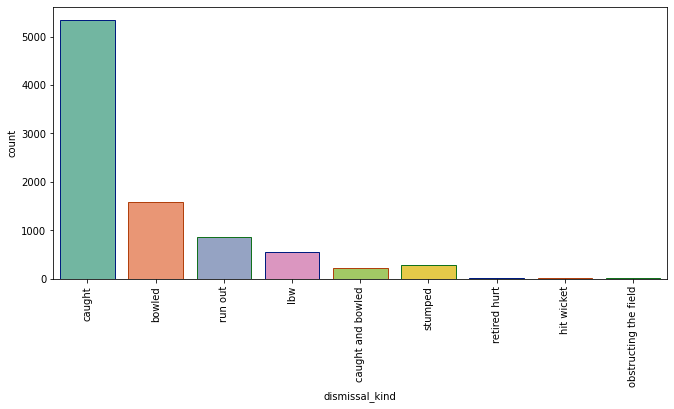

In [228]:
plt.figure(figsize=(11,5))

splot=sns.countplot(x="dismissal_kind",data=deliveries_file,palette="Set2", edgecolor=sns.color_palette("dark", 3))
plt.xticks(rotation=90)
plt.show()

# Analysis of Final Matches

In [287]:
final_matches=match_file.drop_duplicates(subset=['season'], keep='last')
final_matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,win_by
58,59,2017,Hyderabad,2017-05-21,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal",NJ Llong,S Ravi,NaN,Bat
116,117,2008,Mumbai,2008-06-01,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen,NaN,Bowl
173,174,2009,Johannesburg,2009-05-24,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Deccan Chargers,6,0,A Kumble,New Wanderers Stadium,RE Koertzen,SJA Taufel,NaN,Bat
233,234,2010,Mumbai,2010-04-25,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy,RE Koertzen,SJA Taufel,NaN,Bat
306,307,2011,Chennai,2011-05-28,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,58,0,M Vijay,"MA Chidambaram Stadium, Chepauk",Asad Rauf,SJA Taufel,NaN,Bat
380,381,2012,Chennai,2012-05-27,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Kolkata Knight Riders,0,5,MS Bisla,"MA Chidambaram Stadium, Chepauk",BF Bowden,SJA Taufel,NaN,Bowl
456,457,2013,Kolkata,2013-05-26,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,23,0,KA Pollard,Eden Gardens,HDPK Dharmasena,SJA Taufel,NaN,Bat
516,517,2014,Bangalore,2014-06-01,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,3,MK Pandey,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN,Bowl
575,576,2015,Kolkata,2015-05-24,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,41,0,RG Sharma,Eden Gardens,HDPK Dharmasena,RK Illingworth,NaN,Bat
635,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN,Bat


In [295]:
final_matches[['season','winner']].sort_values('season').reset_index(drop=True)

,season,winner
0,2008,Rajasthan Royals
1,2009,Deccan Chargers
2,2010,Chennai Super Kings
3,2011,Chennai Super Kings
4,2012,Kolkata Knight Riders
5,2013,Mumbai Indians
6,2014,Kolkata Knight Riders
7,2015,Mumbai Indians
8,2016,Sunrisers Hyderabad
9,2017,Mumbai Indians


In [296]:
final_matches['winner'].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Sunrisers Hyderabad      1
Rajasthan Royals         1
Deccan Chargers          1
Name: winner, dtype: int64

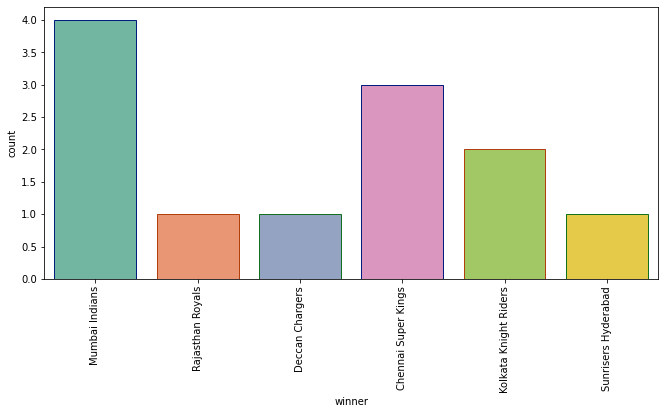

In [298]:
plt.figure(figsize=(11,5))

splot=sns.countplot(x="winner",data=final_matches,palette="Set2", edgecolor=sns.color_palette("dark", 3))

plt.xticks(rotation=90)
plt.show()

# Man of the match in finals

In [303]:
final_matches[['player_of_match','winner']].reset_index(drop=True)

,player_of_match,winner
0,KH Pandya,Mumbai Indians
1,YK Pathan,Rajasthan Royals
2,A Kumble,Deccan Chargers
3,SK Raina,Chennai Super Kings
4,M Vijay,Chennai Super Kings
5,MS Bisla,Kolkata Knight Riders
6,KA Pollard,Mumbai Indians
7,MK Pandey,Kolkata Knight Riders
8,RG Sharma,Mumbai Indians
9,BCJ Cutting,Sunrisers Hyderabad


# Does Toss winning affects Final Results?

In [300]:
final_matches[['toss_winner','toss_decision','winner']].reset_index(drop=True)

,toss_winner,toss_decision,winner
0,Mumbai Indians,bat,Mumbai Indians
1,Rajasthan Royals,field,Rajasthan Royals
2,Royal Challengers Bangalore,field,Deccan Chargers
3,Chennai Super Kings,bat,Chennai Super Kings
4,Chennai Super Kings,bat,Chennai Super Kings
5,Chennai Super Kings,bat,Kolkata Knight Riders
6,Mumbai Indians,bat,Mumbai Indians
7,Kolkata Knight Riders,field,Kolkata Knight Riders
8,Chennai Super Kings,field,Mumbai Indians
9,Sunrisers Hyderabad,bat,Sunrisers Hyderabad


# Batting/Bowling first impacting winning chances in finals

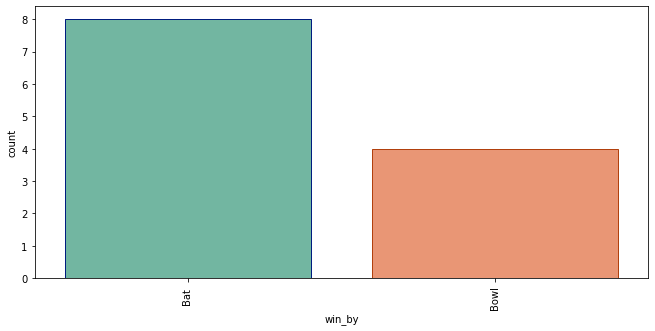

In [301]:
plt.figure(figsize=(11,5))

splot=sns.countplot(x="win_by",data=final_matches,palette="Set2", edgecolor=sns.color_palette("dark", 3))

plt.xticks(rotation=90)
plt.show()

# What do teams choose more often in finals?


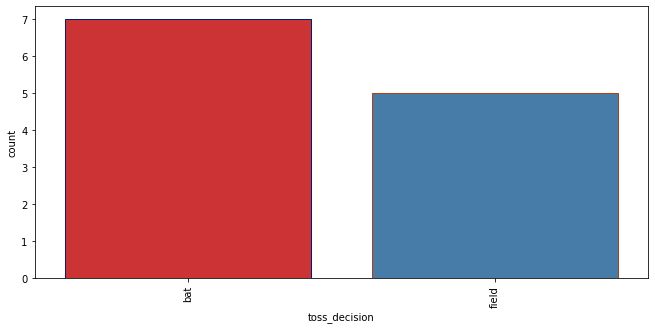

In [308]:
plt.figure(figsize=(11,5))

splot=sns.countplot(x="toss_decision",data=final_matches,palette="Set1", edgecolor=sns.color_palette("dark", 3))

plt.xticks(rotation=90)
plt.show()

# 

# Which City hosted the maximum finals


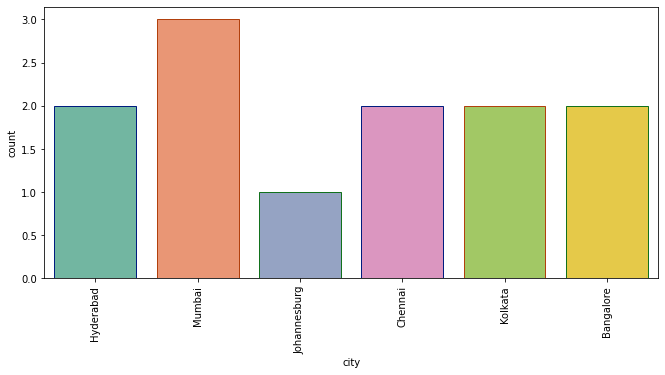

In [309]:
plt.figure(figsize=(11,5))

splot=sns.countplot(x="city",data=final_matches,palette="Set2", edgecolor=sns.color_palette("dark", 3))

plt.xticks(rotation=90)
plt.show()

# Distribution of runs

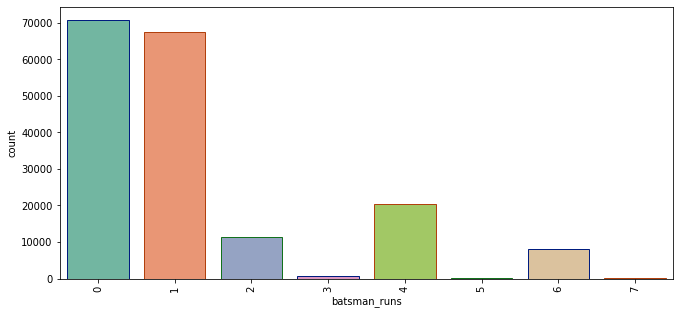

In [324]:
plt.figure(figsize=(11,5))

splot=sns.countplot(x="batsman_runs",data=deliveries_file,palette="Set2", edgecolor=sns.color_palette("dark", 3))

plt.xticks(rotation=90)
plt.show()

# Analysis of Boundaries

Number of fours hit by teams





In [318]:
fours=deliveries_file[deliveries_file['batsman_runs']==4]
fours.groupby('batting_team')['batsman_runs'].agg('count')

batting_team
Chennai Super Kings            2193
Deccan Chargers                 957
Delhi Capitals                  242
Delhi Daredevils               2158
Gujarat Lions                   460
Kings XI Punjab                2458
Kochi Tuskers Kerala            170
Kolkata Knight Riders          2434
Mumbai Indians                 2588
Pune Warriors                   525
Rajasthan Royals               2035
Rising Pune Supergiant          197
Rising Pune Supergiants         171
Royal Challengers Bangalore    2360
Sunrisers Hyderabad            1444
Name: batsman_runs, dtype: int64

Runs collected only by hitting fours by teams

In [319]:
fours.groupby('batting_team')['batsman_runs'].agg('sum')

batting_team
Chennai Super Kings             8772
Deccan Chargers                 3828
Delhi Capitals                   968
Delhi Daredevils                8632
Gujarat Lions                   1840
Kings XI Punjab                 9832
Kochi Tuskers Kerala             680
Kolkata Knight Riders           9736
Mumbai Indians                 10352
Pune Warriors                   2100
Rajasthan Royals                8140
Rising Pune Supergiant           788
Rising Pune Supergiants          684
Royal Challengers Bangalore     9440
Sunrisers Hyderabad             5776
Name: batsman_runs, dtype: int64

Number of sixes hit by teams

In [322]:
sixes=deliveries_file[deliveries_file['batsman_runs']==6]
sixes.groupby('batting_team')['batsman_runs'].agg('count')

batting_team
Chennai Super Kings             973
Deccan Chargers                 400
Delhi Capitals                   87
Delhi Daredevils                801
Gujarat Lions                   155
Kings XI Punjab                 976
Kochi Tuskers Kerala             53
Kolkata Knight Riders           930
Mumbai Indians                 1096
Pune Warriors                   196
Rajasthan Royals                681
Rising Pune Supergiant           89
Rising Pune Supergiants          68
Royal Challengers Bangalore    1132
Sunrisers Hyderabad             533
Name: batsman_runs, dtype: int64

Runs collected only by hitting fours by teams

In [323]:
sixes.groupby('batting_team')['batsman_runs'].agg('sum')

batting_team
Chennai Super Kings            5838
Deccan Chargers                2400
Delhi Capitals                  522
Delhi Daredevils               4806
Gujarat Lions                   930
Kings XI Punjab                5856
Kochi Tuskers Kerala            318
Kolkata Knight Riders          5580
Mumbai Indians                 6576
Pune Warriors                  1176
Rajasthan Royals               4086
Rising Pune Supergiant          534
Rising Pune Supergiants         408
Royal Challengers Bangalore    6792
Sunrisers Hyderabad            3198
Name: batsman_runs, dtype: int64